In [61]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [62]:
# this is the metadata of peru
metadata_df = pd.read_csv("Peru_meta_dataset(onlytime and global score.csv")

In [63]:
metadata_df.head()

Directory             FileName  Global_Score       Time
0  GRABADOR-SDZG-AM-1  20190616_150000.WAV      0.024959  15.000000
1  GRABADOR-SDZG-AM-1  20190616_151000.WAV      0.777727  15.166667
2  GRABADOR-SDZG-AM-1  20190616_152000.WAV      0.685252  15.333333
3  GRABADOR-SDZG-AM-1  20190616_153000.WAV      0.949008  15.500000
4  GRABADOR-SDZG-AM-1  20190616_154000.WAV      0.036467  15.666667

In [64]:
# delete those fault data
metadata_df = metadata_df[metadata_df['Global_Score'] != -1]

In [65]:
#change time from PDT TO UTC
metadata_df['Tim'] = metadata_df['Time'] - 5
metadata_df['Time'] = metadata_df['Tim'].apply(lambda x: x if x >= 0 else x + 24)

In [67]:
time_df = metadata_df["Time"]
scores_df = metadata_df["Global_Score"]

In [68]:
time_list = time_df.to_list()
time_list = list(dict.fromkeys(time_list))

(0.0, 24.0)

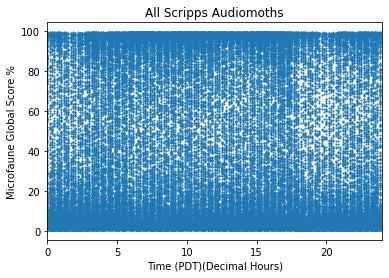

In [69]:
plot.scatter(time_df,scores_df*100,s=1)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score %")
plot.title("All Scripps Audiomoths")
plot.xlim(0,24)
#plot.savefig("All_Audiomoths_Scatterplot.png")

***We could see that the graph we generated by using peru data is very similar with the graph we generated in AID_NeurIPS_2021***


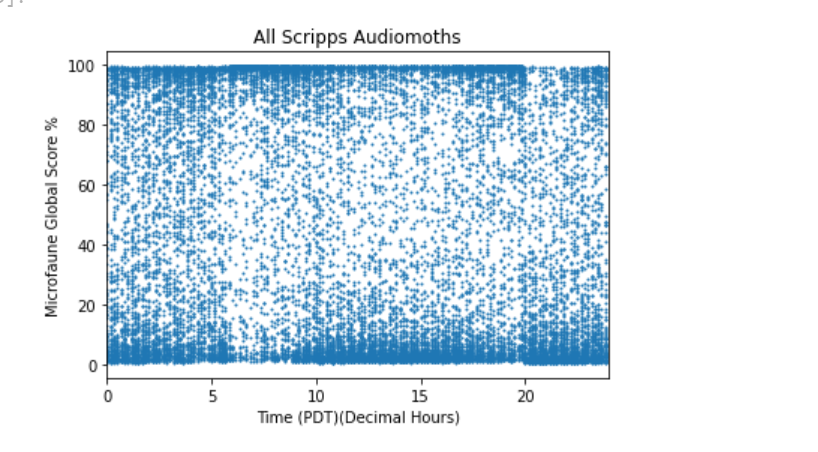

1. We are defining Dawn as starting at 5:50 AM ==> 5.83 and ending at 9:40 AM ==> 9.67
2. We are defining Dusk as start at 5:40 PM ==> 17.67 and ending at 8 PM 20.00

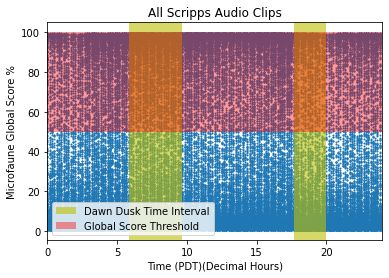

In [70]:
plot.scatter(time_df,scores_df*100,s=1)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score %")
plot.title("All Scripps Audio Clips")
plot.xlim(0,24)
plot.axvspan(5.83,9.67,facecolor='y',alpha=0.6)
plot.axvspan(17.67,20.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Time Interval")
plot.axhspan(50,100,facecolor='r',alpha=0.4,label="Global Score Threshold")
plot.legend(loc="lower left")
plot.savefig("All_Clips_Highlight_Intersection.png")

Text(0.5, 1.0, '')

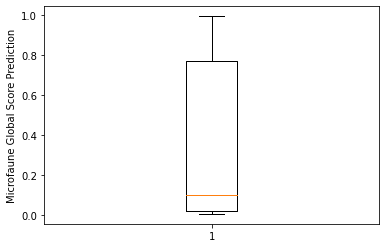

In [71]:
plot.boxplot(scores_df);
plot.ylabel("Microfaune Global Score Prediction")
plot.title("")

***at here, the graph is a little bit different. However, different dataset will have different average global score. The difference is acceptable***

In [72]:
time_list.sort()
averaged_score_list = []
for time in time_list:
    relevant_rows = metadata_df[metadata_df["Time"] == time]
    scores = relevant_rows["Global_Score"].to_numpy()
    average_score = np.mean(scores) * 100
    averaged_score_list.append(average_score)

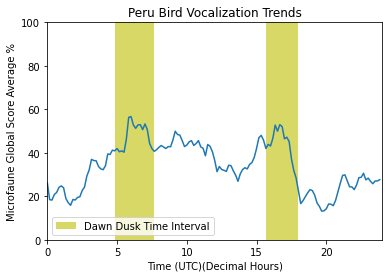

In [78]:
plot.plot(time_list,averaged_score_list)
plot.xlabel("Time (UTC)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Average %")
plot.title("Peru Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)
plot.axvspan(4.83,7.67,facecolor='y',alpha=0.6)
plot.axvspan(15.67,18.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Time Interval")
plot.legend(loc="lower left")

(0.0, 24.0)

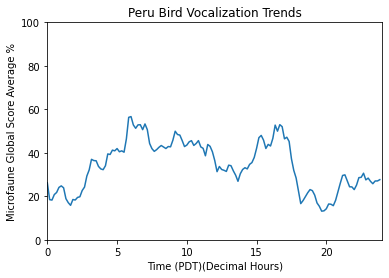

In [79]:
plot.plot(time_list,averaged_score_list)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Average %")
plot.title("Peru Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)

In [80]:
time_list.sort()
median_score_list = []
for time in time_list:
    relevant_rows = metadata_df[metadata_df["Time"] == time]
    scores = relevant_rows["Global_Score"].to_numpy()
    median_score = np.median(scores)*100
    median_score_list.append(median_score)

In [81]:
test_df = pd.DataFrame()
test_df["Time"] = time_list
test_df["Score"] = median_score_list
#test_df.to_csv("chorus_trends.csv",index=False)

(0.0, 24.0)

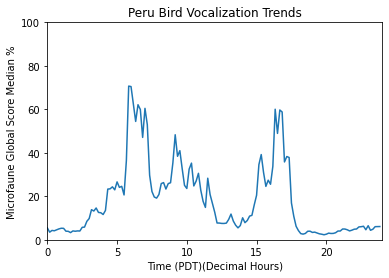

In [82]:
plot.plot(time_list,median_score_list)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Median %")
plot.title("Peru Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)
#plot.savefig("Scripps_Median_Vocalization_Trends.png")

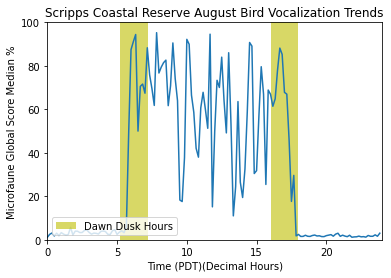

In [90]:
plot.plot(time_list,median_score_list)
plot.xlabel("Time (PDT)(Decimal Hours)")
plot.ylabel("Microfaune Global Score Median %")
plot.title("Scripps Coastal Reserve August Bird Vocalization Trends")
plot.ylim(0,100)
plot.xlim(0,24)
plot.axvspan(5.2,7.2,facecolor='y',alpha=0.6)
plot.axvspan(16.0,18.0,facecolor='y',alpha=0.6, label = "Dawn Dusk Hours")
plot.legend(loc="lower left")

In [84]:
am_list = metadata_df["Directory"].to_list()
am_list = list(dict.fromkeys(am_list))

C:\Users\Dell\AppData\Local\Temp/ipykernel_24828/3429748738.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot.figure()


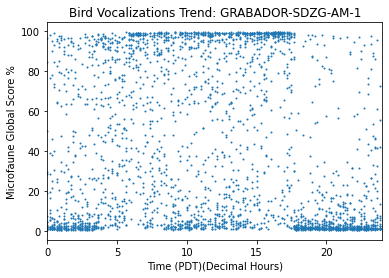

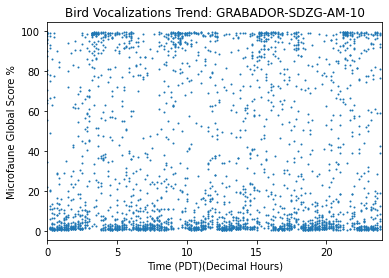

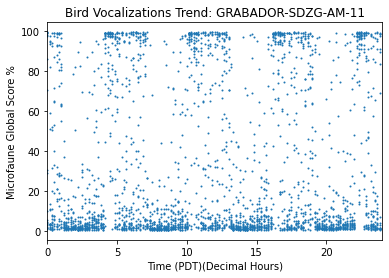

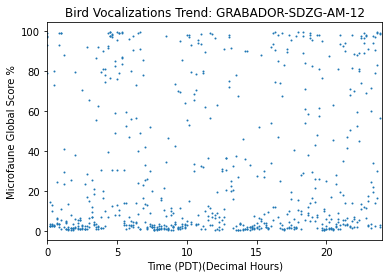

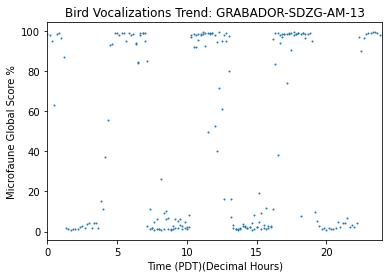

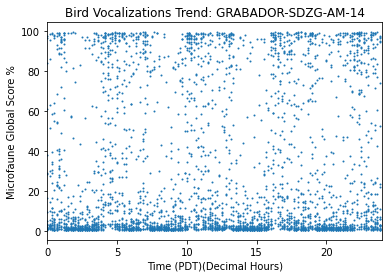

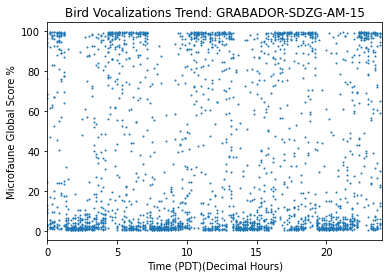

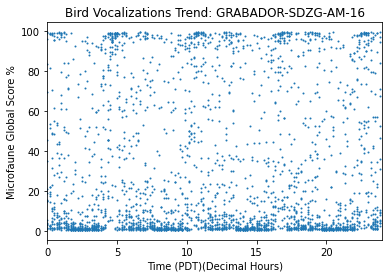

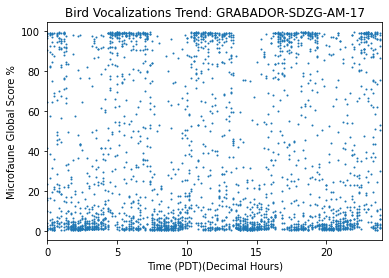

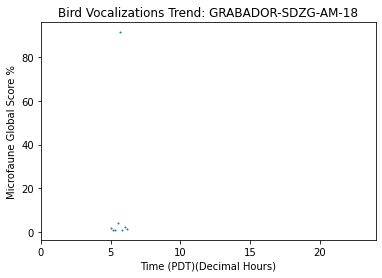

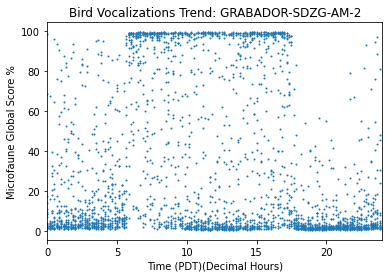

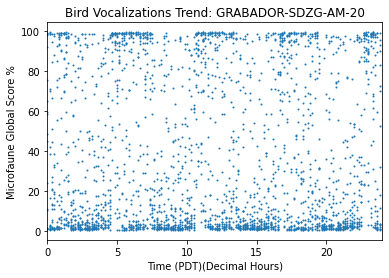

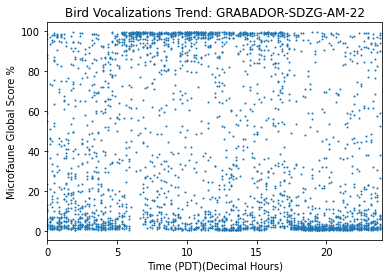

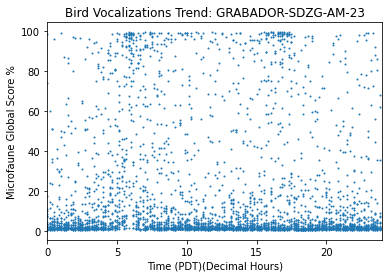

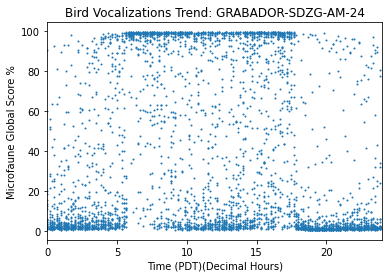

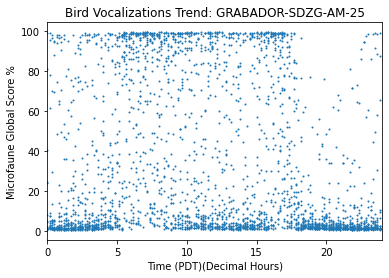

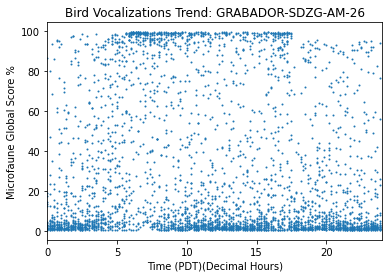

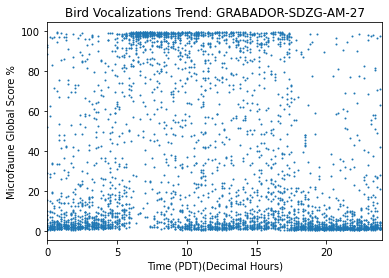

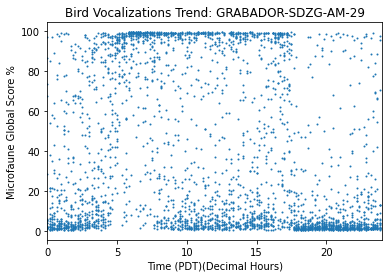

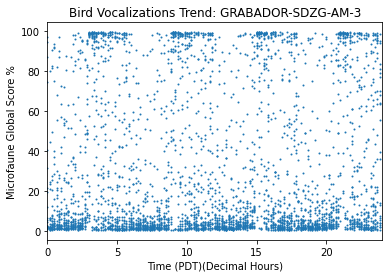

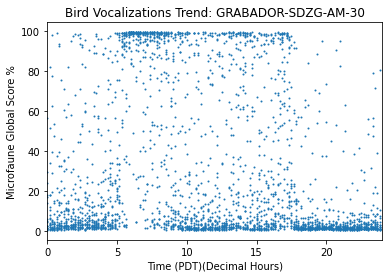

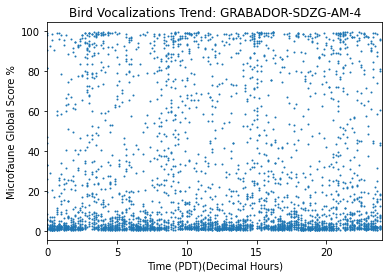

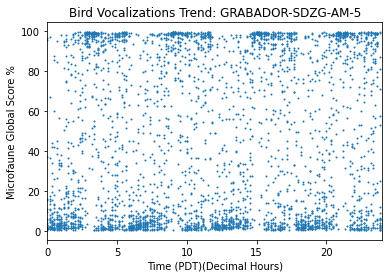

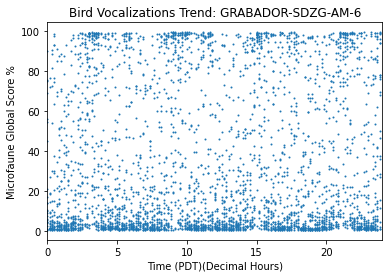

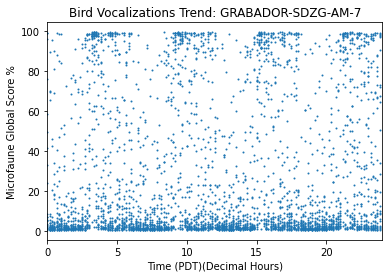

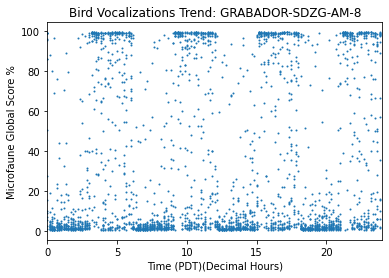

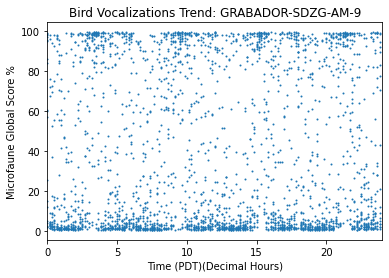

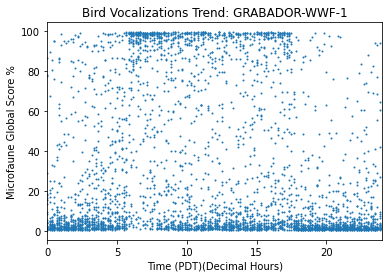

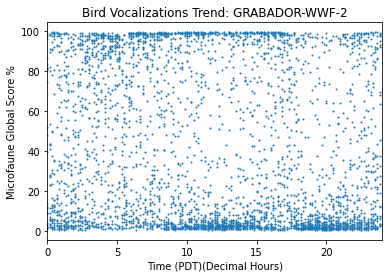

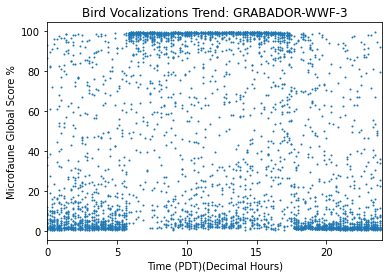

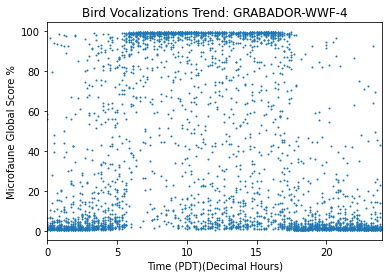

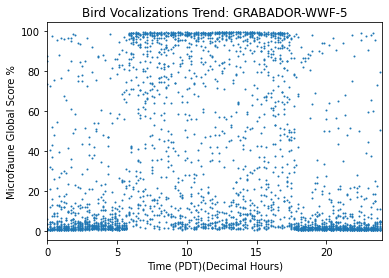

In [85]:
# Creating a scatterplot for each audiomoth
for am in am_list:
    am_df = metadata_df[metadata_df["Directory"] == am]
    am_time_df = am_df["Time"]
    am_globalscore_df = am_df["Global_Score"]
    plot.figure()
    plot.scatter(am_time_df,am_globalscore_df*100,s=1)
    plot.xlabel("Time (PDT)(Decimal Hours)")
    plot.ylabel("Microfaune Global Score %")
    plot.title("Bird Vocalizations Trend: "+am)
    plot.xlim(0,24)

F:\Aanacondo\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
F:\Aanacondo\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Dell\AppData\Local\Temp/ipykernel_24828/745304569.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot.figure()


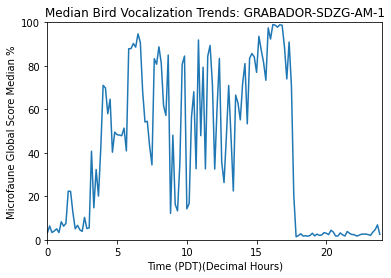

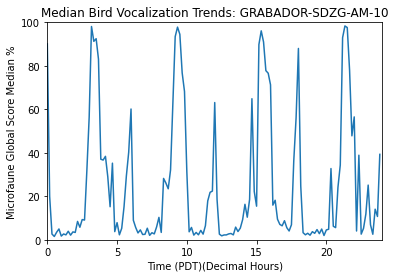

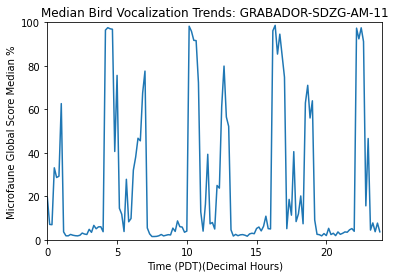

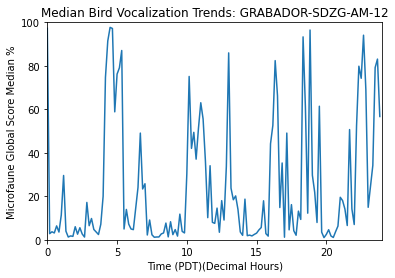

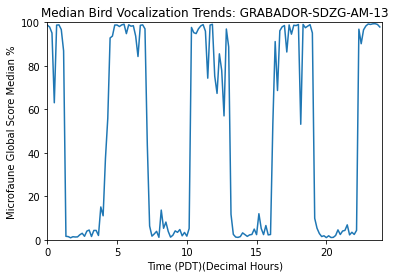

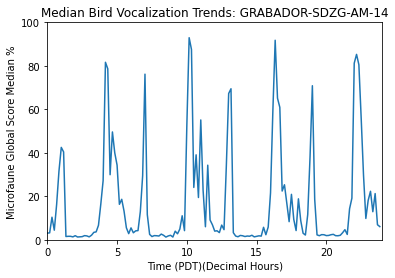

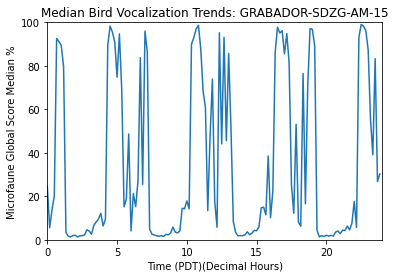

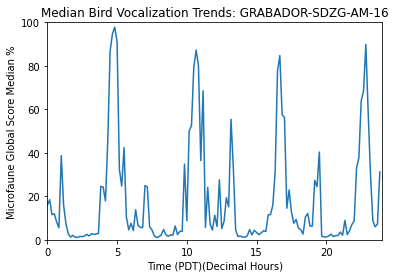

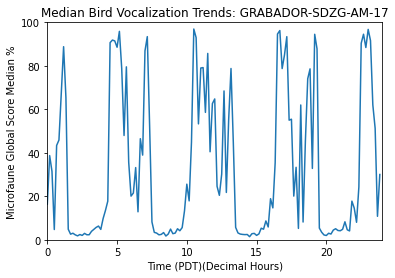

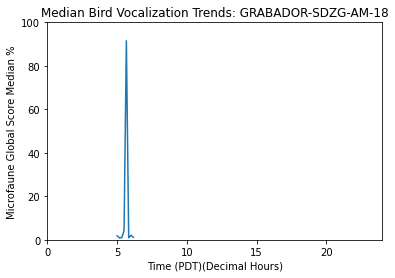

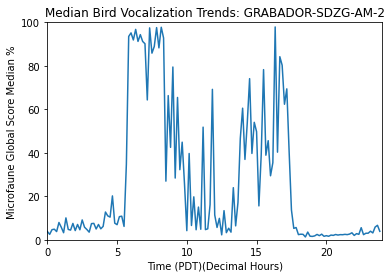

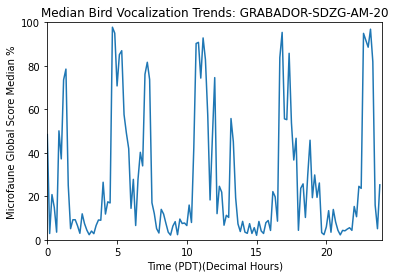

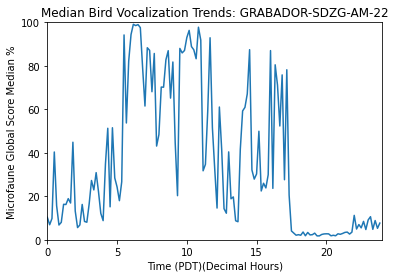

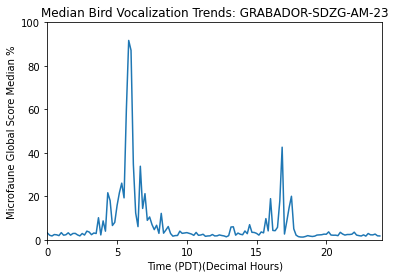

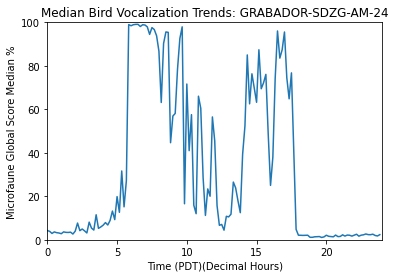

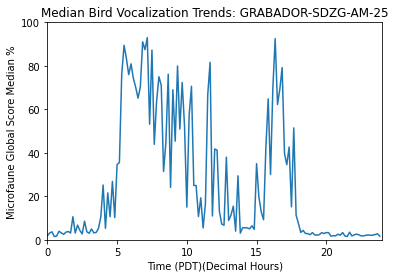

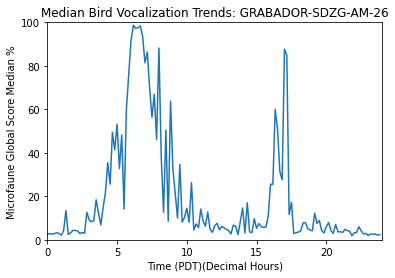

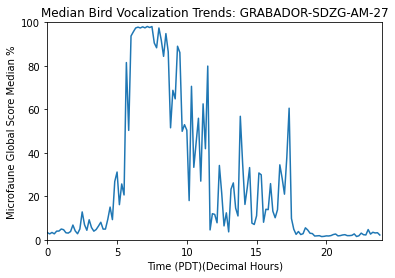

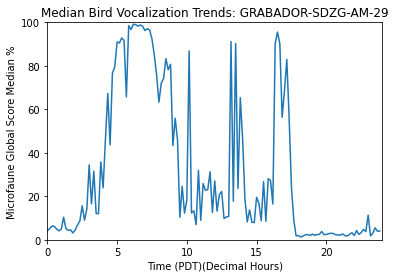

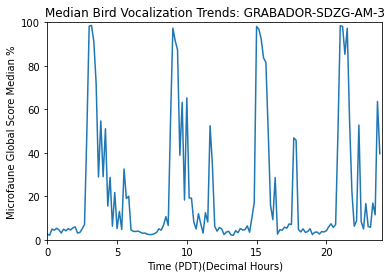

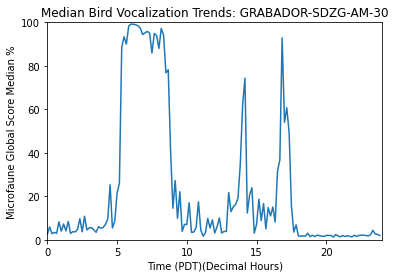

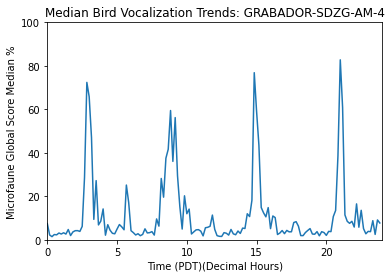

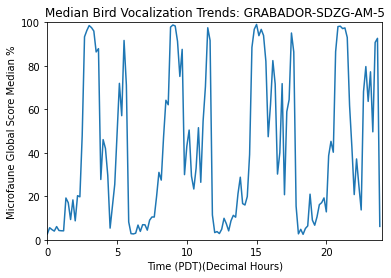

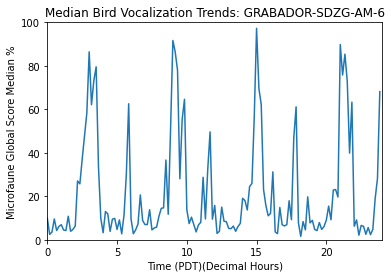

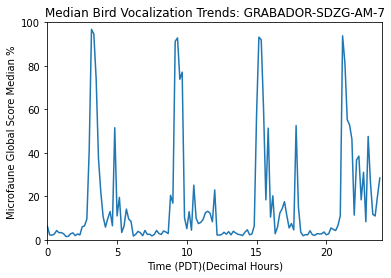

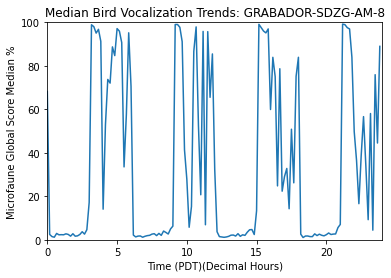

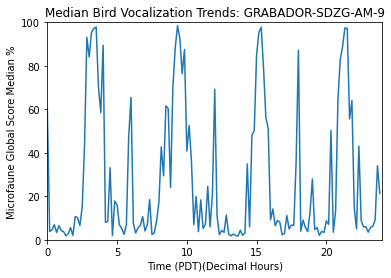

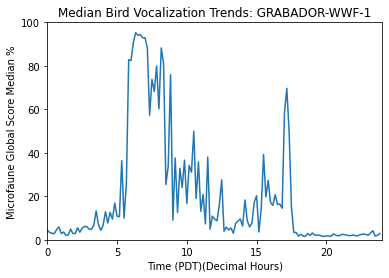

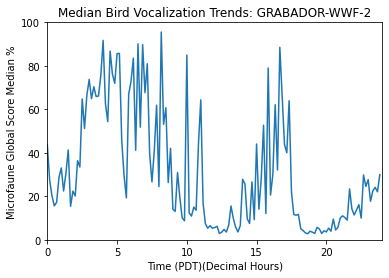

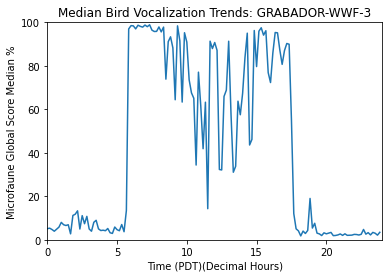

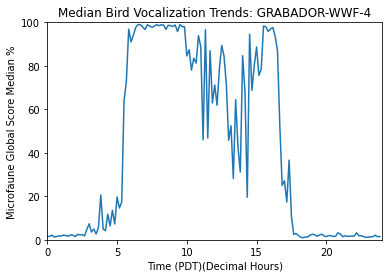

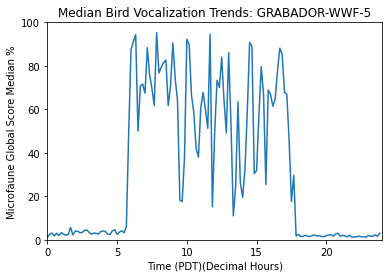

In [86]:
# Creating a Median Global Score plot for each Audiomoth
for am in am_list:
    am_df = metadata_df[metadata_df["Directory"] == am]
    median_score_list = []
    for time in time_list:
        relevant_rows = am_df[am_df["Time"] == time]
        scores = relevant_rows["Global_Score"].to_numpy()
        median_score = np.median(scores)*100
        median_score_list.append(median_score)
    plot.figure()
    plot.plot(time_list,median_score_list)
    plot.xlabel("Time (PDT)(Decimal Hours)")
    plot.ylabel("Microfaune Global Score Median %")
    plot.title("Median Bird Vocalization Trends: " + am)
    plot.ylim(0,100)
    plot.xlim(0,24)
    #plot.savefig(am+"_Median_Bird_Vocalization_Trends.png")

C:\Users\Dell\AppData\Local\Temp/ipykernel_24828/2177833426.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plot.figure()


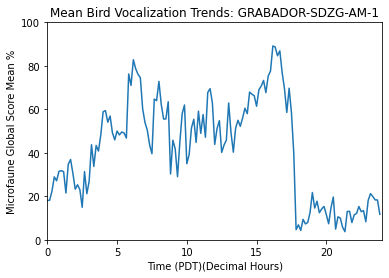

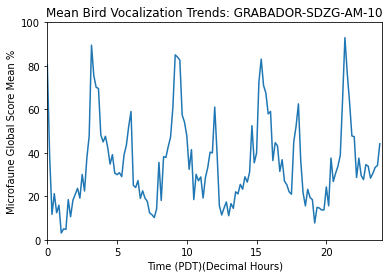

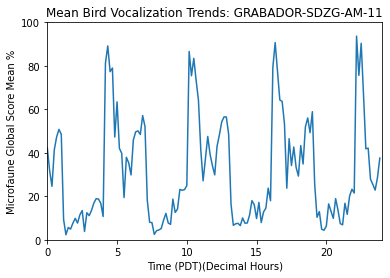

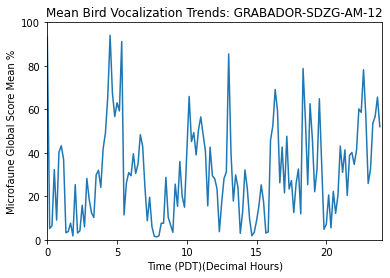

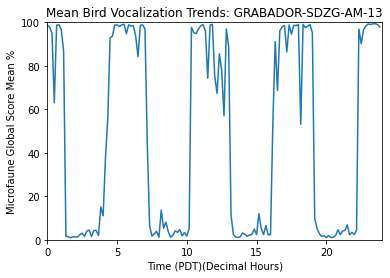

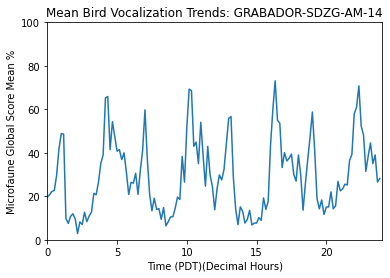

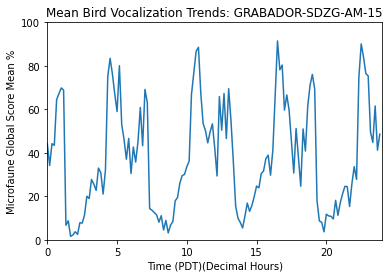

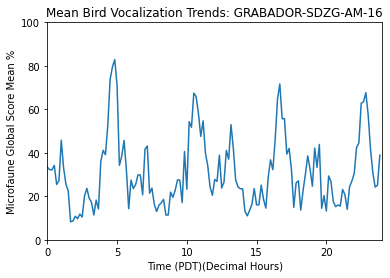

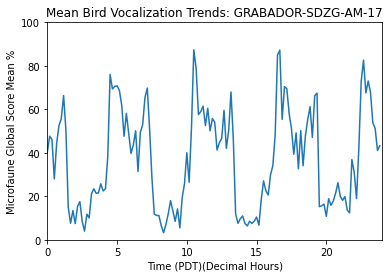

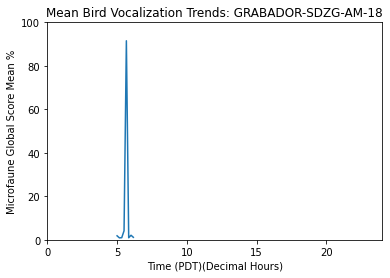

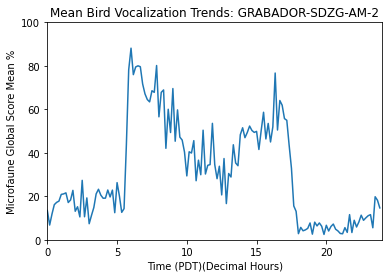

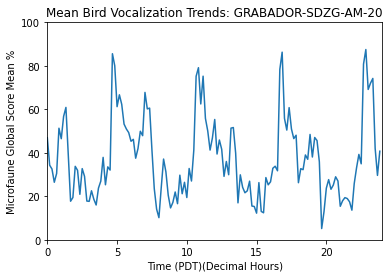

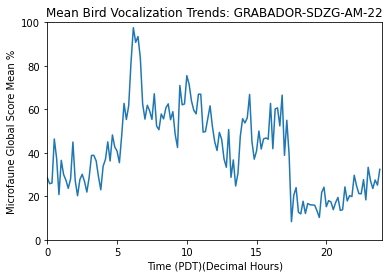

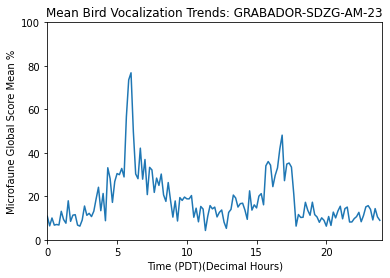

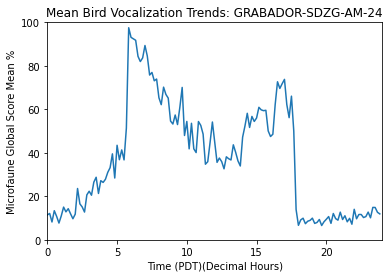

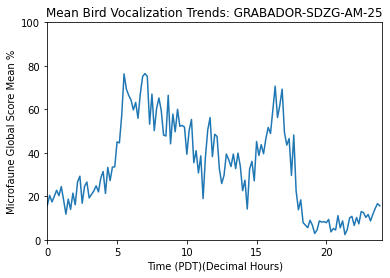

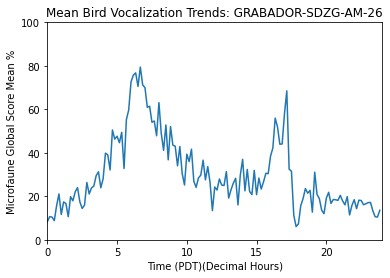

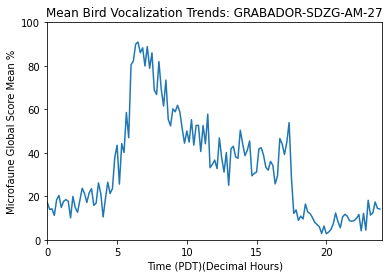

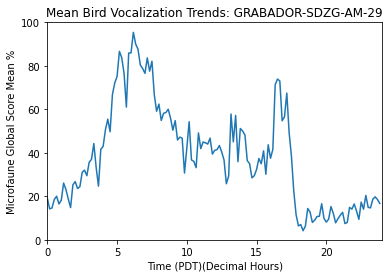

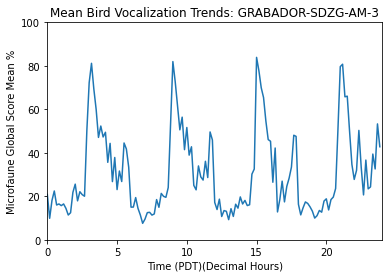

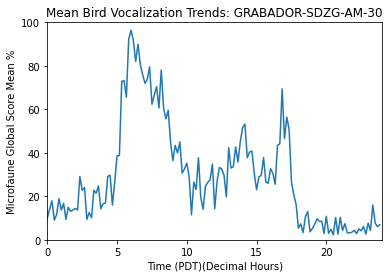

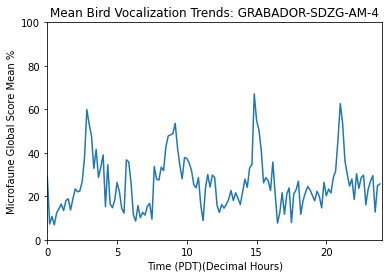

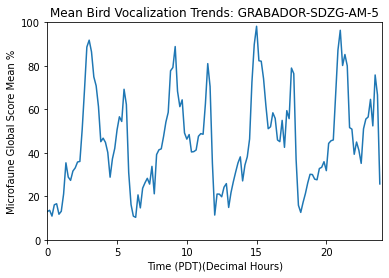

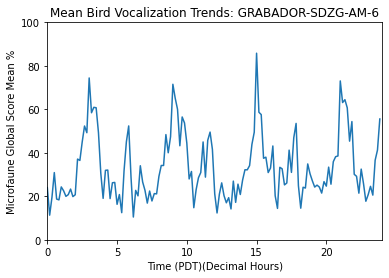

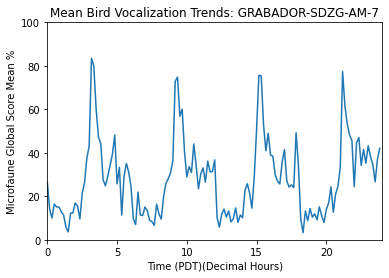

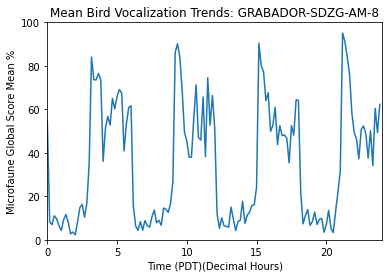

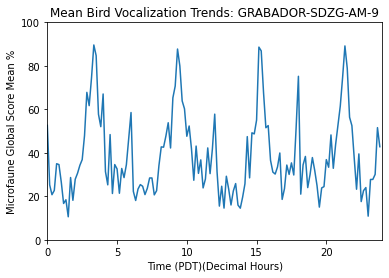

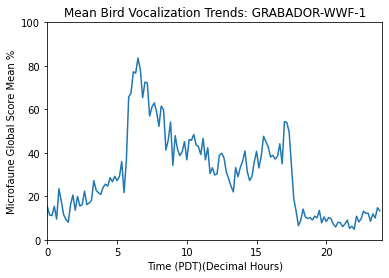

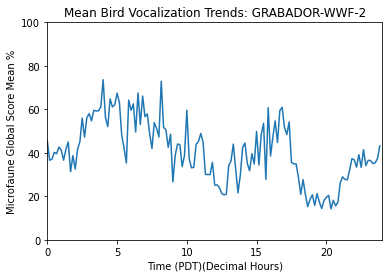

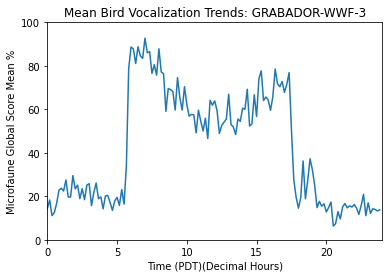

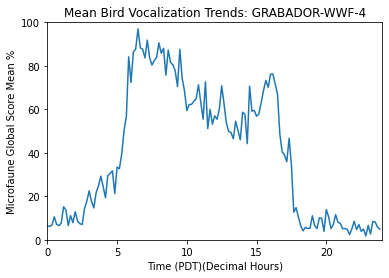

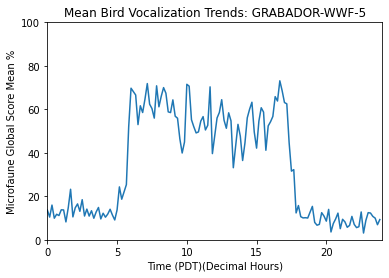

In [87]:
# Creating a Mean Global Score plot for each Audiomoth
for am in am_list:
    am_df = metadata_df[metadata_df["Directory"] == am]
    mean_score_list = []
    for time in time_list:
        relevant_rows = am_df[am_df["Time"] == time]
        scores = relevant_rows["Global_Score"].to_numpy()
        mean_score = np.mean(scores)*100
        mean_score_list.append(mean_score)
    plot.figure()
    plot.plot(time_list,mean_score_list)
    plot.xlabel("Time (PDT)(Decimal Hours)")
    plot.ylabel("Microfaune Global Score Mean %")
    plot.title("Mean Bird Vocalization Trends: " + am)
    plot.ylim(0,100)
    plot.xlim(0,24)
    #plot.savefig(am+"_Mean_Bird_Vocalization_Trends.png")

### All the graph looks similar in AID_NeurIPS_2021. Even though there are some difference such as the time interval of dawn and dusk, most of them are similar